# Softmax Classifier

This exercise guides you through the process of classifying images using a Softmax classifier. As part of this you will:

- Implement a fully vectorized loss function for the Softmax classifier
- Calculate the analytical gradient using vectorized code
- Tune hyperparameters on a validation set
- Optimize the loss function with Stochastic Gradient Descent (SGD)
- Visualize the learned weights

In [2]:
# start-up code! 
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from load_cifar10_tvt import load_cifar10_train_val
X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10_train_val()
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Val data shape: ', X_val.shape
print 'Val labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Train, validation and testing sets have been created as 
 X_i and y_i where i=train,val,test
Train data shape:  (3073L, 49000L)
Train labels shape:  (49000L,)
Val data shape:  (3073L, 1000L)
Val labels shape:  (1000L,)
Test data shape:  (3073L, 1000L)
Test labels shape:  (1000L,)


Code for this section is to be written in `f17cs7643/classifiers/softmax.py`

In [4]:
# Now, implement the vectorized version in softmax_loss_vectorized.

import time
from f17cs7643.classifiers.softmax import softmax_loss_vectorized

W = np.random.randn(10, 3073) * 0.0001

tic = time.time()
loss, grad = softmax_loss_vectorized(W, X_train, y_train, 0.00001)
toc = time.time()
print 'vectorized loss: %e computed in %fs' % (loss, toc - tic)

# As a rough sanity check, our loss should be something close to -log(0.1).
print 'loss: %f' % loss
print 'sanity check: %f' % (-np.log(0.1))

# gradient check. 
from f17cs7643.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_vectorized(w, X_train, y_train, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

vectorized loss: 2.360132e+00 computed in 1.231000s
loss: 2.360132
sanity check: 2.302585
numerical: -0.542295 analytic: -0.542295, relative error: 4.279945e-08
numerical: 2.716988 analytic: 2.716987, relative error: 2.555772e-08
numerical: -1.597924 analytic: -1.597924, relative error: 3.561914e-08
numerical: 1.944617 analytic: 1.944617, relative error: 4.721436e-09
numerical: -1.244018 analytic: -1.244018, relative error: 3.222809e-09
numerical: 0.790825 analytic: 0.790825, relative error: 9.420841e-08
numerical: -0.102579 analytic: -0.102579, relative error: 1.644851e-07
numerical: 0.869372 analytic: 0.869371, relative error: 8.167231e-08
numerical: -3.055064 analytic: -3.055065, relative error: 2.539041e-08
numerical: -1.228758 analytic: -1.228758, relative error: 1.193294e-08


float64
iteration 0 / 1000: loss 5.636934
iteration 100 / 1000: loss 3.046152
iteration 200 / 1000: loss 2.621922
iteration 300 / 1000: loss 2.395998
iteration 400 / 1000: loss 2.304308
iteration 500 / 1000: loss 2.453745
iteration 600 / 1000: loss 2.060801
iteration 700 / 1000: loss 2.330235
iteration 800 / 1000: loss 2.112296
iteration 900 / 1000: loss 1.976661


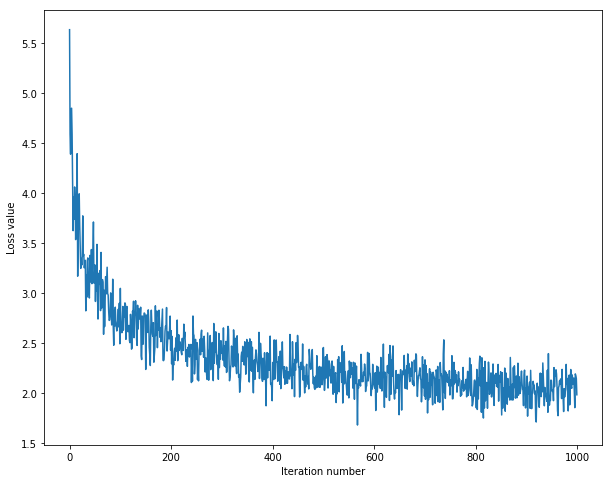

softmax on raw pixels validation set accuracy: 0.342000


In [5]:
# Now that efficient implementations to calculate loss function and gradient of the softmax are ready,
# use it to train the classifier on the cifar-10 data
from f17cs7643.classifiers import Softmax
classifier = Softmax()
loss_hist = classifier.train(X_train, y_train, learning_rate=1e-6, reg=1e-6, num_iters=1000,batch_size=128, verbose=True)
# Plot loss vs. iterations
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

# Evaluate on validation set
y_val_pred = classifier.predict(X_val)
val_accuracy = np.mean(y_val == y_val_pred)
print 'softmax on raw pixels validation set accuracy: %f' % (val_accuracy, )

In [6]:
# Evaluate on test set
y_test_pred = classifier.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print 'softmax on raw pixels final test set accuracy: %f' % (test_accuracy, )

softmax on raw pixels final test set accuracy: 0.329000


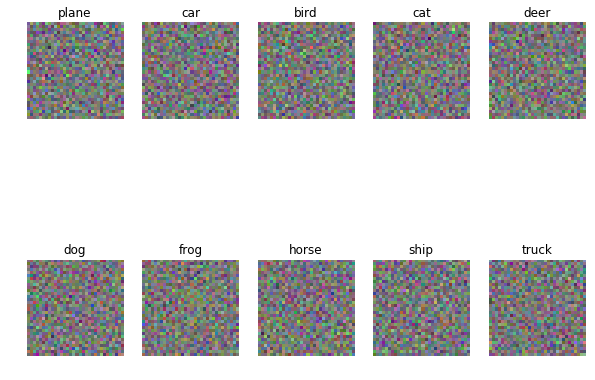

In [7]:
# Visualize the learned weights for each class
w = classifier.W[:,:-1] # strip out the bias
w = w.reshape(10, 32, 32, 3)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in xrange(10):
  plt.subplot(2, 5, i + 1)
  
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])